#### Visualization of DICOM image

DICOM Image Shape: (320, 320)
Pixel Data Type: uint16


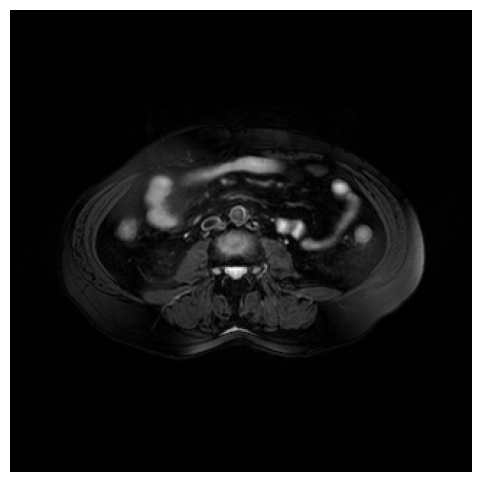

In [29]:
import pydicom
import matplotlib.pyplot as plt

# Load the MRI DICOM file
dicom_path = 'data_abdomen/MR/13/T2SPIR/DICOM_anon/IMG-0061-00001.dcm'  # Replace with your DICOM file path
dicom_data = pydicom.dcmread(dicom_path)  # Read the DICOM file

# Access the pixel data for visualization
mri_image = dicom_data.pixel_array  # Get image data as a NumPy array

# Check basic information
print("DICOM Image Shape:", mri_image.shape)
print("Pixel Data Type:", mri_image.dtype)

# Plot the MRI image
plt.figure(figsize=(6, 6))
plt.imshow(mri_image, cmap='gray')
plt.axis('off')
plt.show()


#### check annotation

In [8]:
import numpy as np
from PIL import Image
import glob
import os

# Path to the directory containing PNG files
path_pattern = 'data_abdomen/MR/*/T2SPIR/Ground/*.png'  # Update if the path changes

# Initialize a set to hold all unique classes across all images
all_unique_classes = set()

# Loop through each PNG file in the directory structure
for file_path in glob.glob(path_pattern):
    # Load the grayscale image
    gt_image = Image.open(file_path).convert('L')
    
    # Convert the image to a NumPy array
    gt_array = np.array(gt_image)
    
    # Find unique grayscale values in the current image
    unique_classes = np.unique(gt_array)
    
    # Update the set with unique classes from the current image
    all_unique_classes.update(unique_classes)
    
    # print(f"File: {file_path}")
    # print(f"Unique Classes in this file: {unique_classes}")
    # print("------")

# Summary of all unique classes across all images
print("All Unique Classes in Directory:", sorted(all_unique_classes))
print("Total Number of Classes:", len(all_unique_classes))


All Unique Classes in Directory: [0, 63, 126, 189, 252]
Total Number of Classes: 5


#### Convert to NIfTI files

In [35]:
import os
import glob
import numpy as np
import nibabel as nib
import pydicom
from PIL import Image

# Paths
dicom_path_pattern = 'data_abdomen/MR/*/T2SPIR/DICOM_anon/*.dcm'  # Path to DICOM files
png_path_pattern = 'data_abdomen/MR/*/T2SPIR/Ground/*.png'       # Path to PNG ground truth files
output_dir = 'data_abdomen/mri_raw_data/'                         # Output directory for NIfTI files

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Get lists of DICOM and PNG files
dicom_files = sorted(glob.glob(dicom_path_pattern))
png_files = sorted(glob.glob(png_path_pattern))

# Process each file pair
for dicom_file, png_file in zip(dicom_files, png_files):
    # Extract file name prefix
    file_name = os.path.basename(dicom_file).replace('.dcm', '')
    subject_number = dicom_file.split('/')[2]  # Adjust index if needed
    subject_name = f"{int(subject_number):04d}"
    
    # Load and resize MRI DICOM file
    dicom_data = pydicom.dcmread(dicom_file)
    mri_image = dicom_data.pixel_array

    mri_image_resized = mri_image.astype(np.uint16)  # Use uint16 if the original data is 16-bit
    mri_image_pil = Image.fromarray(mri_image_resized)

    if mri_image_pil.mode != 'L':  # 'L' means grayscale mode
        mri_image_pil = mri_image_pil.convert('I')  # Convert to 'I' mode (32-bit signed integer)
        
    mri_image_resized = mri_image_pil.resize((256, 256), Image.LANCZOS)
    mri_resized_array = np.array(mri_image_resized)
    # mri_image_resized = np.array(Image.fromarray(mri_image).resize((256, 256), Image.LANCZOS))
    
    # Convert to NIfTI and save MRI image
    mri_nifti = nib.Nifti1Image(mri_resized_array, affine=np.eye(4))
    mri_output_path = os.path.join(output_dir, f"{subject_name}_{file_name}_image.nii.gz")
    nib.save(mri_nifti, mri_output_path)
    print(f"Saved MRI image to {mri_output_path}")
    
    # Load and resize PNG ground truth file
    gt_image = Image.open(png_file).convert('L')
    gt_image_resized = gt_image.resize((256, 256), Image.NEAREST)  # Preserve class values
    gt_array_resized = np.array(gt_image_resized)
    
    # Convert to NIfTI and save ground truth
    gt_nifti = nib.Nifti1Image(gt_array_resized, affine=np.eye(4))
    gt_output_path = os.path.join(output_dir, f"{subject_name}_{file_name}_label.nii.gz")
    nib.save(gt_nifti, gt_output_path)
    print(f"Saved ground truth annotation to {gt_output_path}")


Saved MRI image to data_abdomen/mri_raw_data/0001_IMG-0002-00001_image.nii.gz
Saved ground truth annotation to data_abdomen/mri_raw_data/0001_IMG-0002-00001_label.nii.gz
Saved MRI image to data_abdomen/mri_raw_data/0001_IMG-0002-00002_image.nii.gz
Saved ground truth annotation to data_abdomen/mri_raw_data/0001_IMG-0002-00002_label.nii.gz
Saved MRI image to data_abdomen/mri_raw_data/0001_IMG-0002-00003_image.nii.gz
Saved ground truth annotation to data_abdomen/mri_raw_data/0001_IMG-0002-00003_label.nii.gz
Saved MRI image to data_abdomen/mri_raw_data/0001_IMG-0002-00004_image.nii.gz
Saved ground truth annotation to data_abdomen/mri_raw_data/0001_IMG-0002-00004_label.nii.gz
Saved MRI image to data_abdomen/mri_raw_data/0001_IMG-0002-00005_image.nii.gz
Saved ground truth annotation to data_abdomen/mri_raw_data/0001_IMG-0002-00005_label.nii.gz
Saved MRI image to data_abdomen/mri_raw_data/0001_IMG-0002-00006_image.nii.gz
Saved ground truth annotation to data_abdomen/mri_raw_data/0001_IMG-0002

In [53]:
import os
import glob
import numpy as np
import nibabel as nib
import pydicom
from PIL import Image

# Paths
dicom_path_pattern = 'data_abdomen/MR/*/T2SPIR/DICOM_anon/*.dcm'  # Path to DICOM files
png_path_pattern = 'data_abdomen/MR/*/T2SPIR/Ground/*.png'       # Path to PNG ground truth files
output_dir = 'data_abdomen/mri_raw_data/'                         # Output directory for NIfTI files

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Get lists of DICOM and PNG files grouped by subject
dicom_files_by_subject = {}
png_files_by_subject = {}

# Group files by subject
dicom_files = sorted(glob.glob(dicom_path_pattern))
png_files = sorted(glob.glob(png_path_pattern))

for dicom_file in dicom_files:
    subject_number = dicom_file.split('/')[2]  # Adjust index if needed
    dicom_files_by_subject.setdefault(subject_number, []).append(dicom_file)

for png_file in png_files:
    subject_number = png_file.split('/')[2]  # Adjust index if needed
    png_files_by_subject.setdefault(subject_number, []).append(png_file)

# Process each subject
for subject_number in dicom_files_by_subject:
    # Get DICOM and PNG files for the subject
    dicom_subject_files = dicom_files_by_subject[subject_number]
    png_subject_files = png_files_by_subject.get(subject_number, [])

    if len(dicom_subject_files) == 0 or len(png_subject_files) == 0:
        print(f"Skipping subject {subject_number} due to missing DICOM or PNG files.")
        continue
    
    # Extract file name prefix and create subject name
    subject_name = f"{int(subject_number):04d}"
    
    # Load and stack MRI DICOM slices
    mri_image_slices = []
    for dicom_file in dicom_subject_files:
        dicom_data = pydicom.dcmread(dicom_file)
        mri_image = dicom_data.pixel_array
        
        mri_image_resized = mri_image.astype(np.uint16)  # Convert to uint16 if the original data is 16-bit
        mri_image_pil = Image.fromarray(mri_image_resized)
        
        if mri_image_pil.mode != 'L':  # 'L' means grayscale mode
            mri_image_pil = mri_image_pil.convert('I')  # Convert to 'I' mode (32-bit signed integer)
        
        mri_image_resized = mri_image_pil.resize((256, 256), Image.LANCZOS)
        mri_image_slices.append(np.array(mri_image_resized))
    
    # Stack MRI slices into a 3D array (256, 256, number_of_slices)
    mri_volume = np.stack(mri_image_slices, axis=-1)
    
    # Convert to NIfTI and save MRI image
    mri_nifti = nib.Nifti1Image(mri_volume, affine=np.eye(4))
    mri_output_path = os.path.join(output_dir, f"{subject_name}_image.nii.gz")
    nib.save(mri_nifti, mri_output_path)
    print(f"Saved MRI volume to {mri_output_path}")
    
    # Load and stack PNG ground truth slices
    gt_image_slices = []
    for png_file in png_subject_files:
        gt_image = Image.open(png_file).convert('L')
        gt_image_resized = gt_image.resize((256, 256), Image.NEAREST)  # Preserve class values
        gt_image_slices.append(np.array(gt_image_resized))
    
    # Stack ground truth slices into a 3D array (256, 256, number_of_slices)
    gt_volume = np.stack(gt_image_slices, axis=-1)
    
    # Convert to NIfTI and save ground truth
    gt_nifti = nib.Nifti1Image(gt_volume, affine=np.eye(4))
    gt_output_path = os.path.join(output_dir, f"{subject_name}_label.nii.gz")
    nib.save(gt_nifti, gt_output_path)
    print(f"Saved ground truth volume to {gt_output_path}")


Saved MRI volume to data_abdomen/mri_raw_data/0001_image.nii.gz
Saved ground truth volume to data_abdomen/mri_raw_data/0001_label.nii.gz
Saved MRI volume to data_abdomen/mri_raw_data/0010_image.nii.gz
Saved ground truth volume to data_abdomen/mri_raw_data/0010_label.nii.gz
Saved MRI volume to data_abdomen/mri_raw_data/0013_image.nii.gz
Saved ground truth volume to data_abdomen/mri_raw_data/0013_label.nii.gz
Saved MRI volume to data_abdomen/mri_raw_data/0015_image.nii.gz
Saved ground truth volume to data_abdomen/mri_raw_data/0015_label.nii.gz
Saved MRI volume to data_abdomen/mri_raw_data/0019_image.nii.gz
Saved ground truth volume to data_abdomen/mri_raw_data/0019_label.nii.gz
Saved MRI volume to data_abdomen/mri_raw_data/0002_image.nii.gz
Saved ground truth volume to data_abdomen/mri_raw_data/0002_label.nii.gz
Saved MRI volume to data_abdomen/mri_raw_data/0020_image.nii.gz
Saved ground truth volume to data_abdomen/mri_raw_data/0020_label.nii.gz
Saved MRI volume to data_abdomen/mri_raw_

#### Visualization using nii.gz

In [54]:
image_file_path = 'data_abdomen/mri_raw_data/0001_image.nii.gz'
label_file_path = 'data_abdomen/mri_raw_data/0001_image.nii.gz'

# Load the image and label NIfTI files
image = nib.load(image_file_path)
label = nib.load(label_file_path)

# Get the data as numpy arrays
image_data = image.get_fdata()
label_data = label.get_fdata()

In [55]:
label_data.shape

(256, 256, 36)

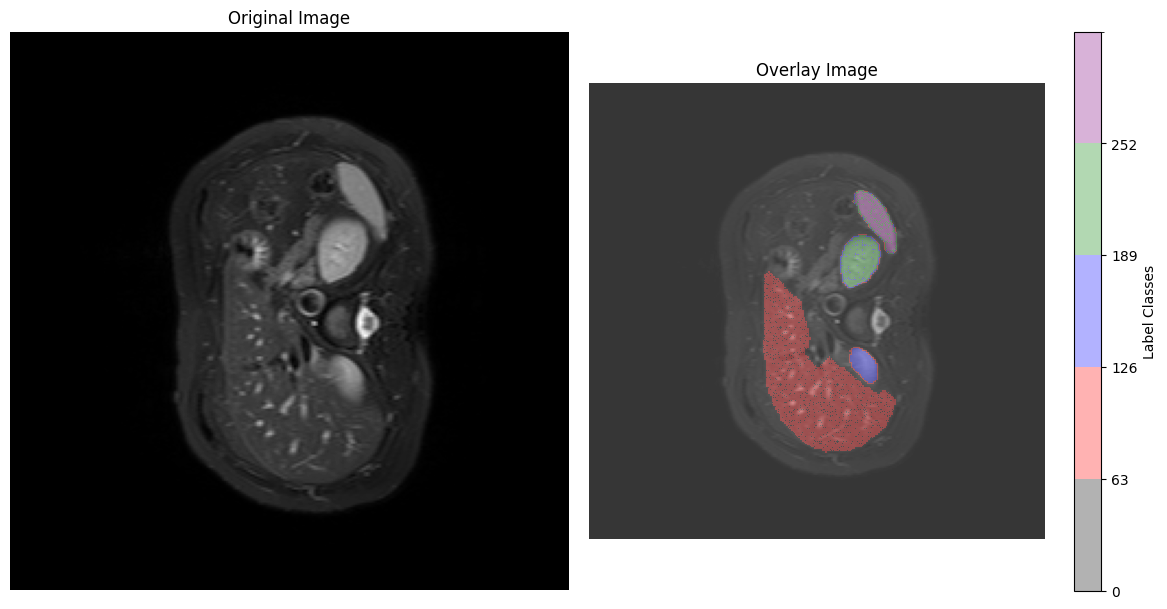

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Paths to the image and label files
image_file_path = 'data_abdomen/mri_raw_data/0010_image.nii.gz'
label_file_path = 'data_abdomen/mri_raw_data/0010_label.nii.gz'

# Load the image and label NIfTI files
image = nib.load(image_file_path)
label = nib.load(label_file_path)

# Get the data as numpy arrays
image_data = image.get_fdata()
label_data = label.get_fdata()

# Choose a slice to visualize (e.g., middle slice along the z-axis)
slice_index = image_data.shape[2] // 2
slice_index = 21
image_slice = image_data[:, :, slice_index]
label_slice = label_data[:, :, slice_index]
# label_slice = np.round(label_slice)

# Define specific label values and corresponding colors
# [background, liver, right kidney, left kidney, spleen]
label_values = [0, 63, 126, 189, 252]
colors = [
    'black', 'red', 'blue', 'green', 'purple'
]

# Create a color map for the labels with the specific values
cmap = mcolors.ListedColormap(colors)
bounds = label_values + [max(label_values) + 1]  # Add an upper bound for normalization
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create a two-panel figure
plt.figure(figsize=(12, 6))

# Plot the original image slice on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(image_slice.T, cmap='gray', origin='lower')
plt.title('Original Image')
plt.axis('off')  # Remove axis for a cleaner view

# Plot the overlay image on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(image_slice.T, cmap='gray', origin='lower', alpha=0.7)
plt.imshow(label_slice.T, cmap=cmap, norm=norm, origin='lower', alpha=0.3)
plt.title('Overlay Image')
colorbar = plt.colorbar(ticks=label_values)
colorbar.set_label('Label Classes')
plt.axis('off')  # Remove axis for a cleaner view

plt.tight_layout()  # Adjust layout
plt.show()
